# scatter

Example scatterplots with Formula 1 data from
https://ergast.com/mrd/db

In [1]:
%load_ext autoreload
%autoreload 2
%autosave 0

Autosave disabled


In [2]:
from etl import DATADIR, ErgastF1
from viz import Plot

In [3]:
f1 = ErgastF1(DATADIR / 'ergast/f1.zip')
plot = Plot()

## How fast are the cars compared to previous years?

In [4]:
fastlaps = (

    # Get each car's fastest lap for each race when possible
    f1.results.dropna(subset=['fastlap_kph'])
    .rename(columns={'fastlap_kph': 'kph'})
    
    # Get race years, circuit names, and team names.
    .join(f1.races['date id_circuit'.split()], on='id_race')
    .join(f1.circuits['circuit'], on='id_circuit')
    .join(f1.teams['team'], on='id_team')
    .assign(year = lambda df: df['date'].dt.year)    
    ['circuit year fastlap kph team'.split()]

    # Sort so that fast laps are drawn over slower laps.
    .sort_values('circuit year kph'.split())
    .reset_index(drop=True)
)
fastlaps

,circuit,year,fastlap,kph,team
0,Albert Park Grand Prix Circuit,2004,8,210.666,Minardi
1,Albert Park Grand Prix Circuit,2004,10,211.741,Minardi
2,Albert Park Grand Prix Circuit,2004,15,215.659,Jordan
3,Albert Park Grand Prix Circuit,2004,7,217.098,McLaren
4,Albert Park Grand Prix Circuit,2004,6,217.336,Jaguar
...,...,...,...,...,...
6217,Yas Marina Circuit,2019,55,197.731,Red Bull
6218,Yas Marina Circuit,2019,44,199.064,Ferrari
6219,Yas Marina Circuit,2019,55,199.688,Ferrari
6220,Yas Marina Circuit,2019,31,200.515,Mercedes


In [5]:
def dots(circuit, team, teamcolor, defcolor):
    title = f"fastest lap for each driver at {circuit}"
    data = fastlaps.loc[fastlaps['circuit'].eq(circuit)].copy()
    data['size'] = data['team'].map({team: 128}).fillna(32)
    data['color'] = data['team'].eq(team)
    data['color'] = data['team'].map({team: teamcolor}).fillna(defcolor)
    data = data['year kph color size'.split()]
    plot.scatter(data, colorbar=None, title=title, ylim=(190, 260))

## giro volante

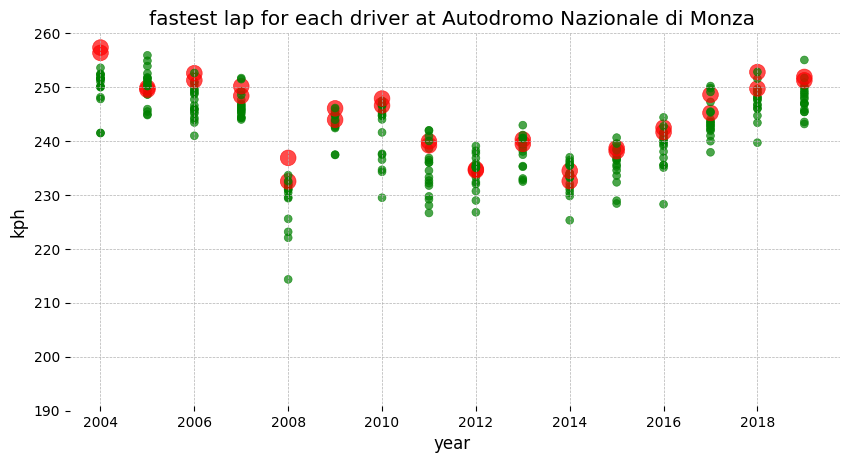

In [6]:
dots('Autodromo Nazionale di Monza', 'Ferrari', 'red', 'green')

## running of the bulls

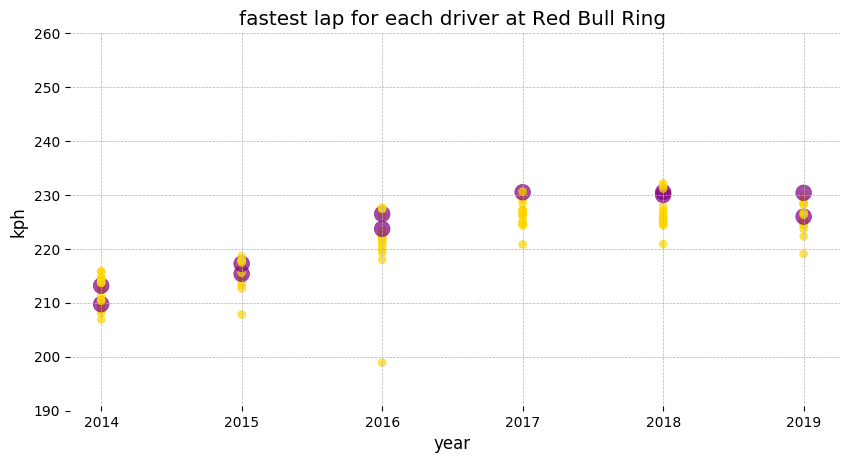

In [7]:
dots('Red Bull Ring', 'Red Bull', 'purple', 'gold')

## geschwindigkeitheim

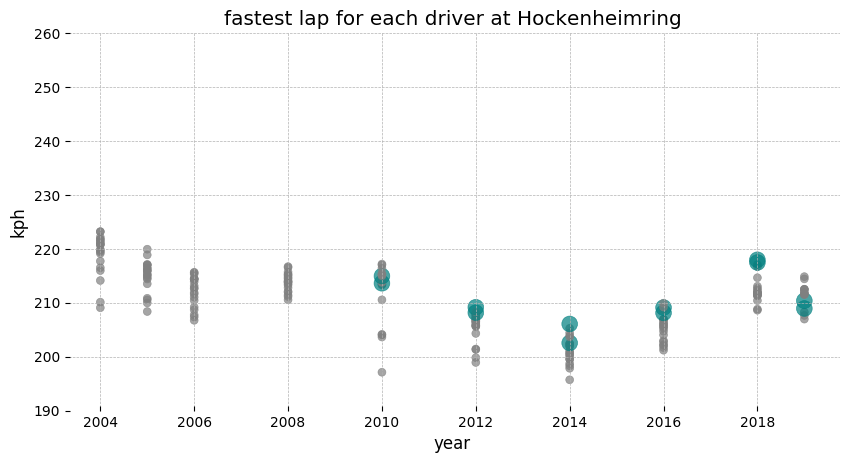

In [8]:
dots('Hockenheimring', 'Mercedes', 'teal', 'grey')